# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [97]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [98]:
df.shape

(30, 17)

In [99]:
df= df.drop_duplicates()

In [100]:
df.shape

(30, 17)

In [101]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [102]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [103]:
# We can see there no null values so we are good to proceed further!

In [104]:
# EDA and and Data Visualization

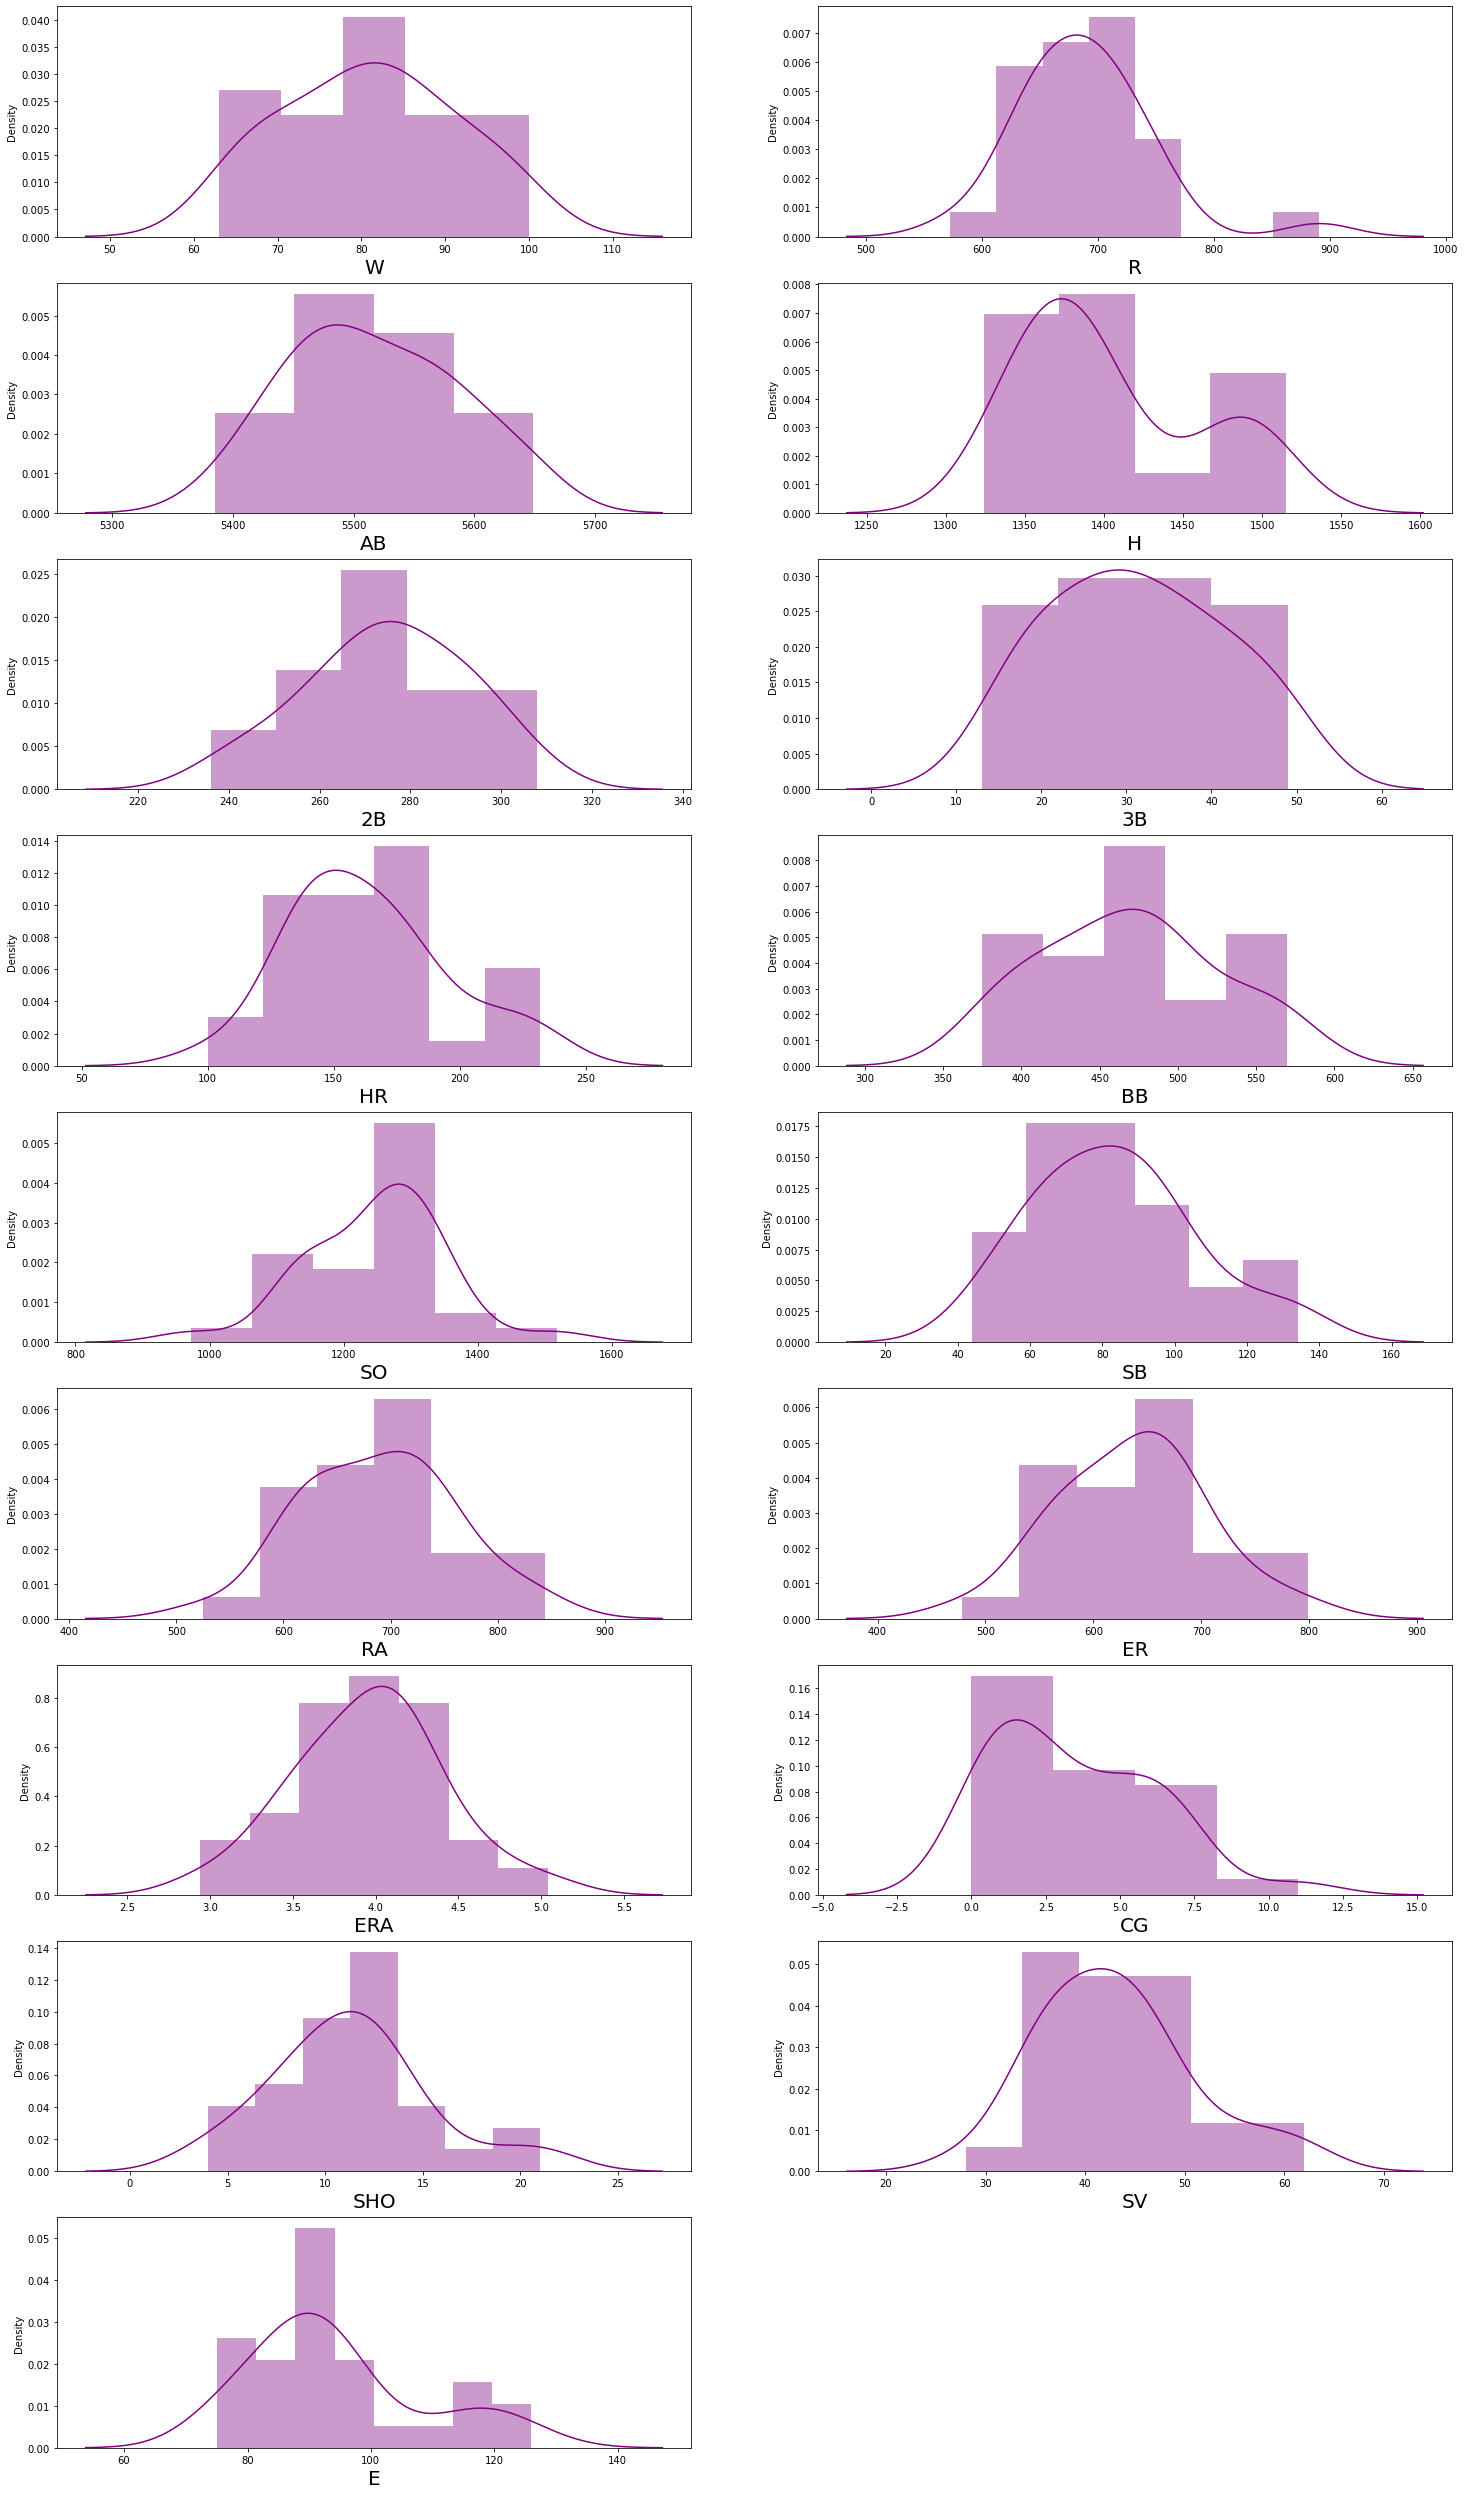

In [105]:
#Univariate Analysis

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'purple')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [106]:
# from above clearly most of the columns are normally distributed

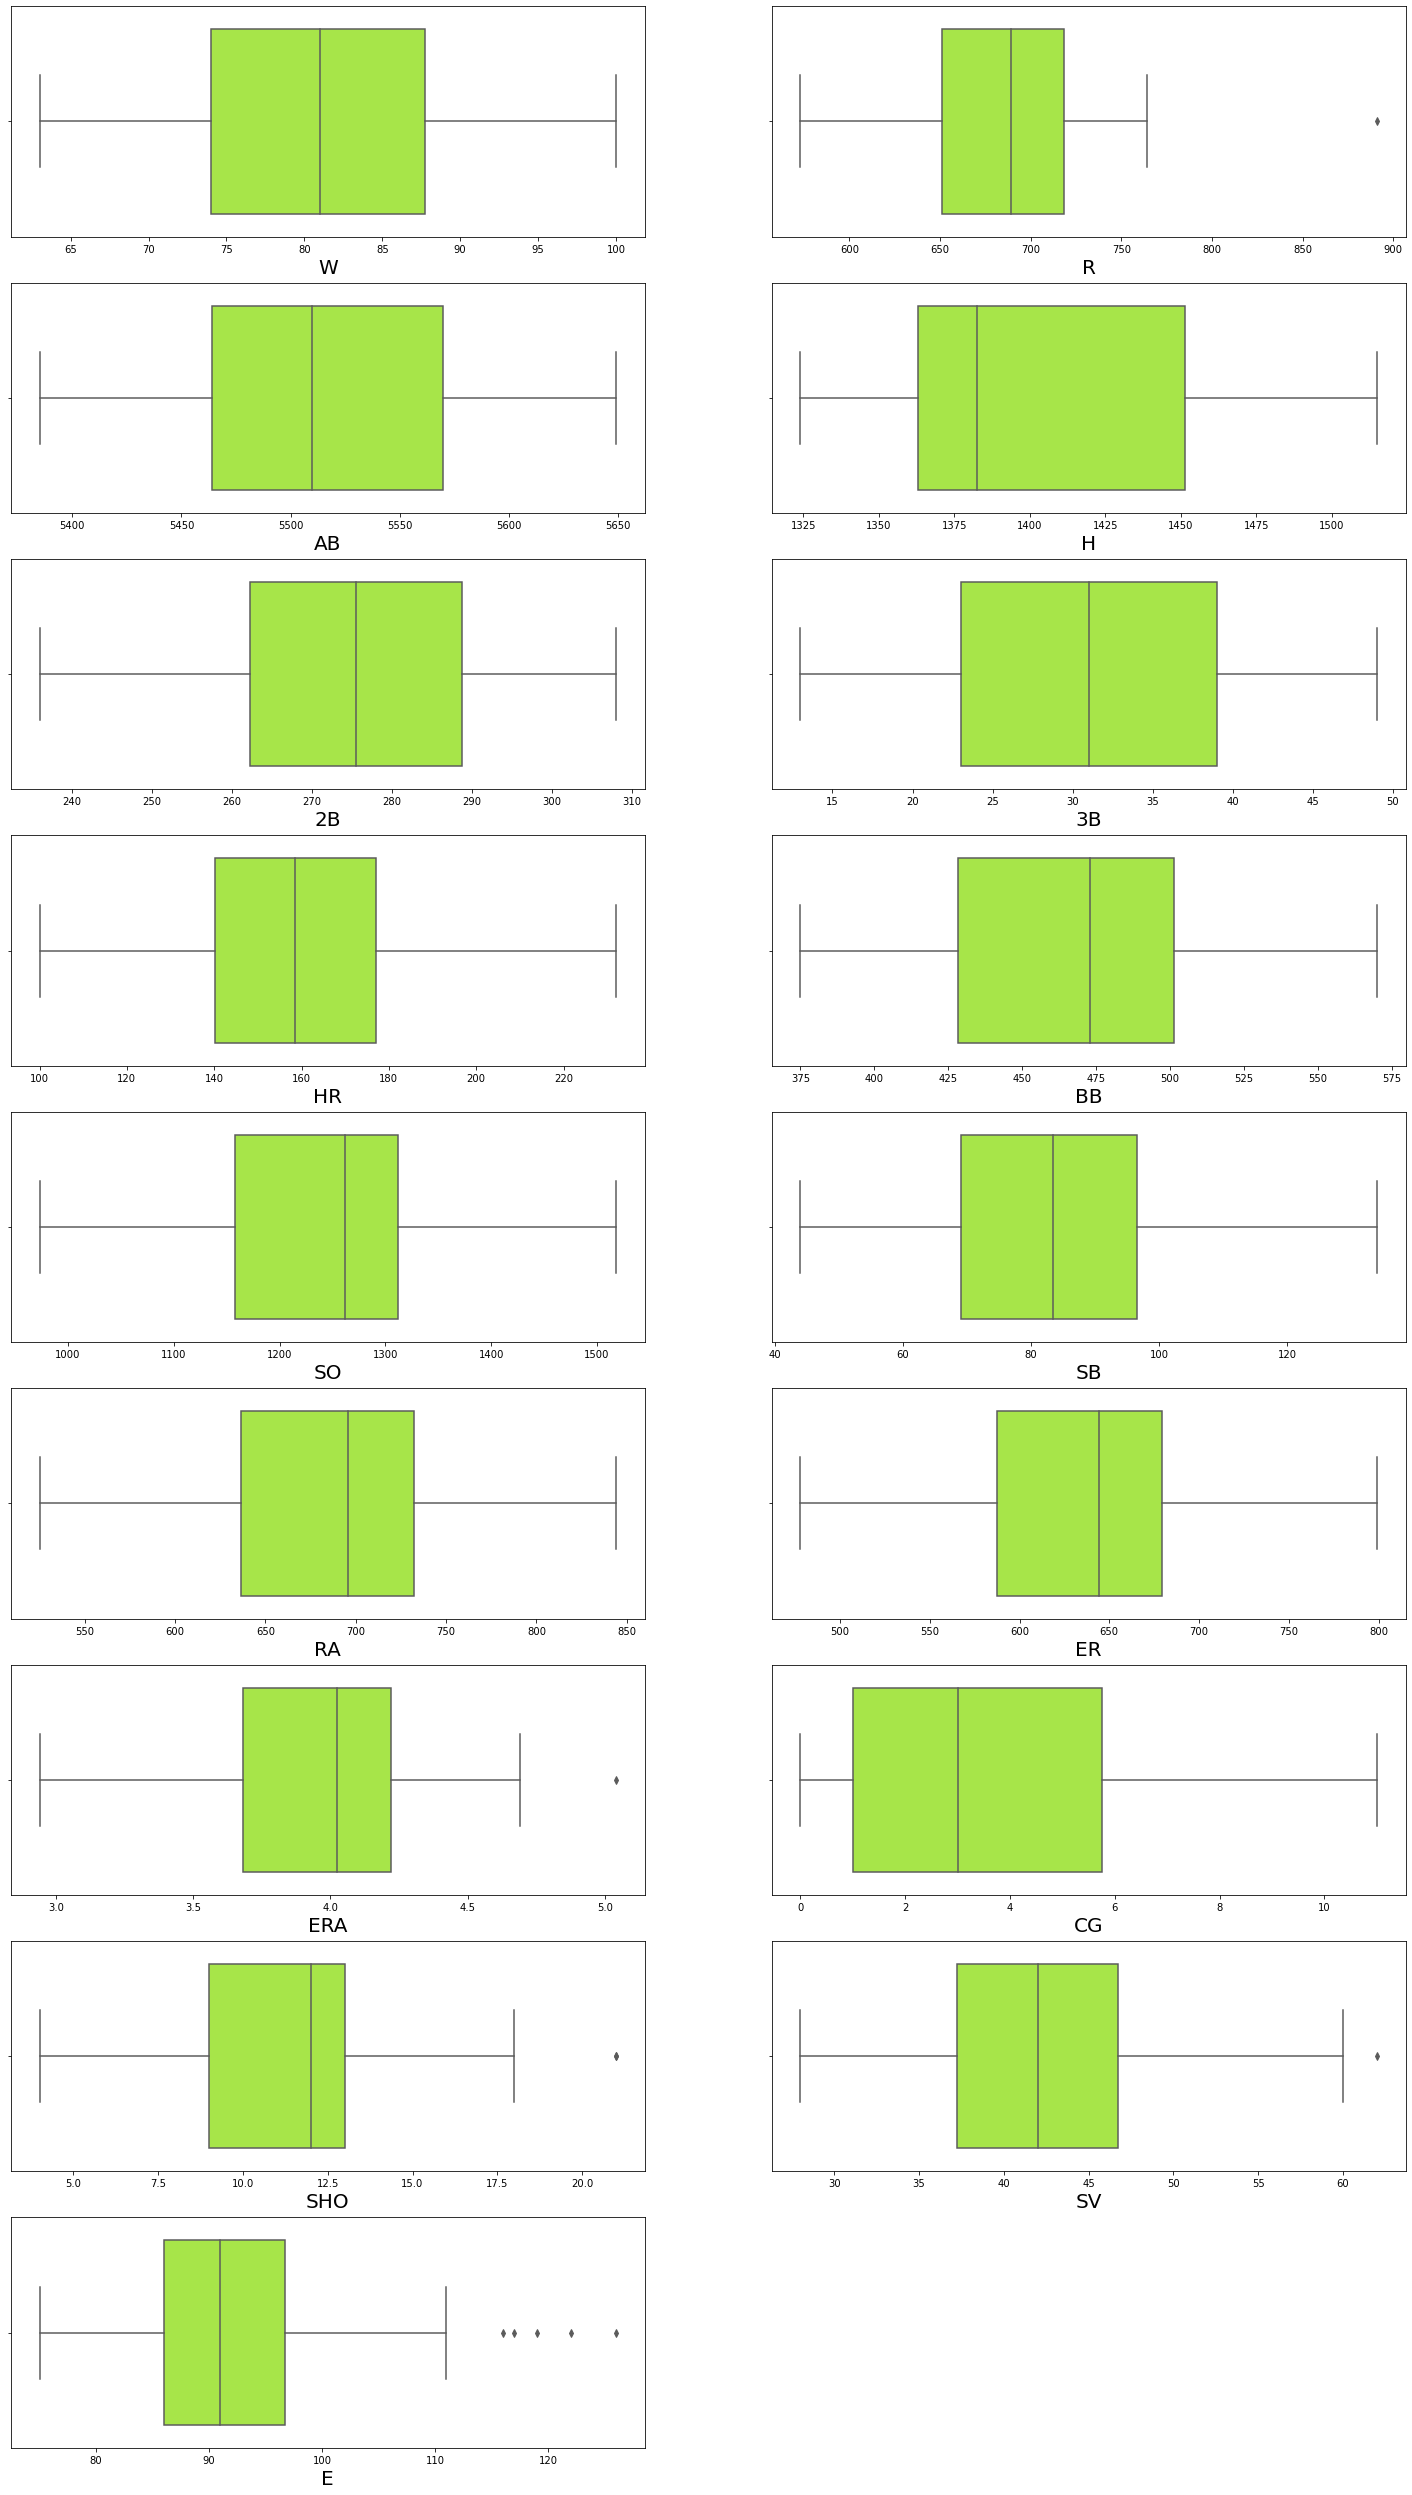

In [107]:
# Boxplot

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.boxplot(df[column], color = 'greenyellow')
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.show()

In [108]:
# R,ERA,SHO,SV and E input variable is having outliers

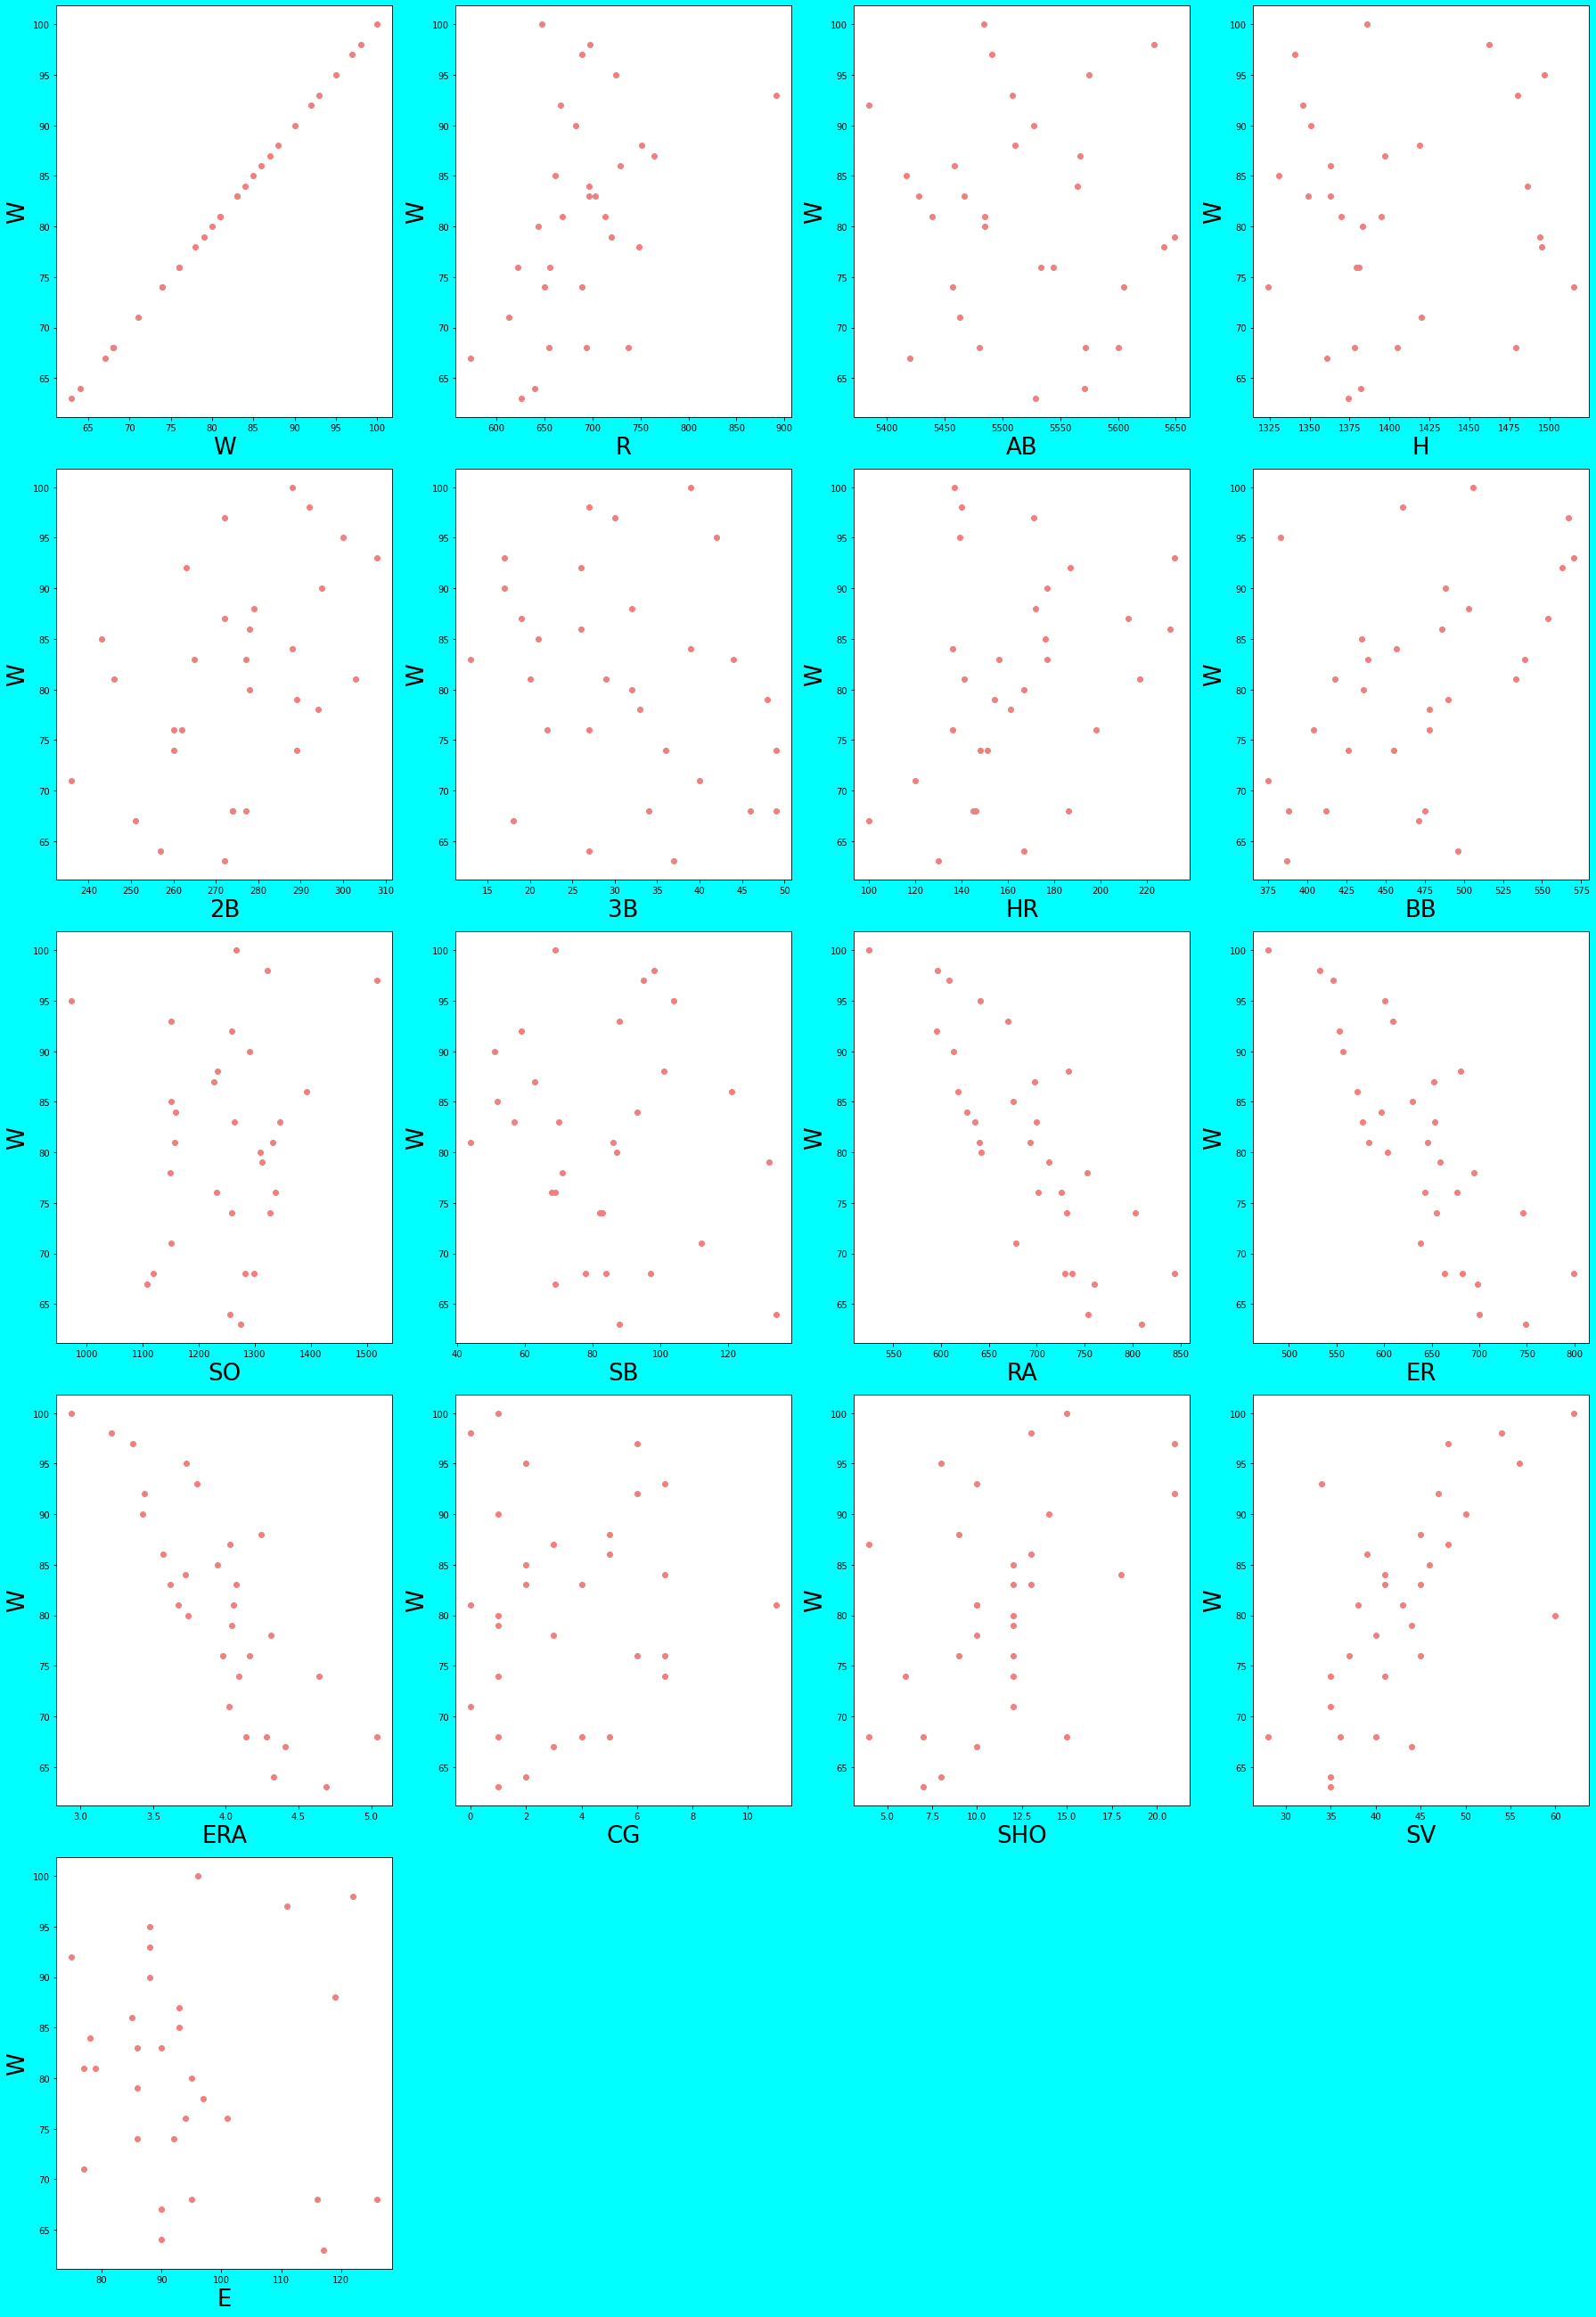

In [109]:
#Bivariate Analysis

plt.figure(figsize = (25,50), facecolor = 'cyan')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(7,4,plotnumber)
        plt.scatter(df[column],df['W'], color='lightcoral')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('W', fontsize=26)
    plotnumber += 1
plt.tight_layout()

In [110]:
# Among all the features, SV,ERA,SHO and R is having almost linear relationship with target variable.

<Figure size 1800x1440 with 0 Axes>

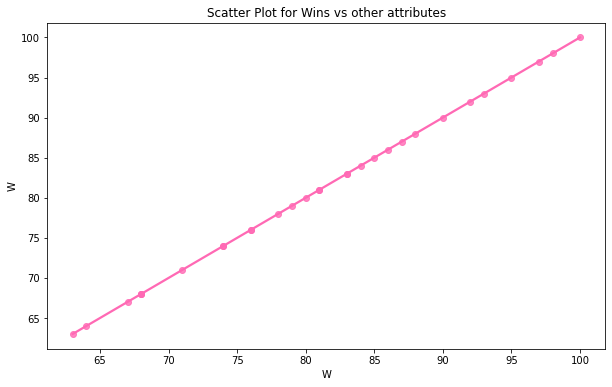

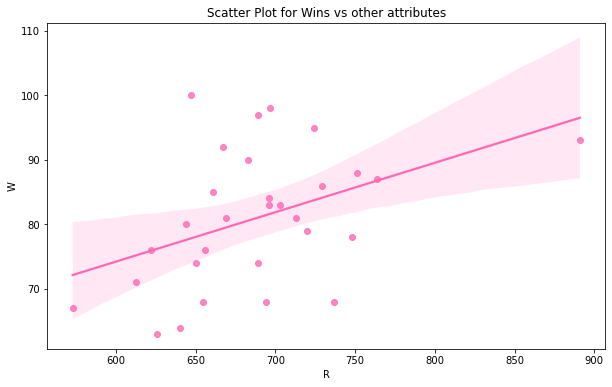

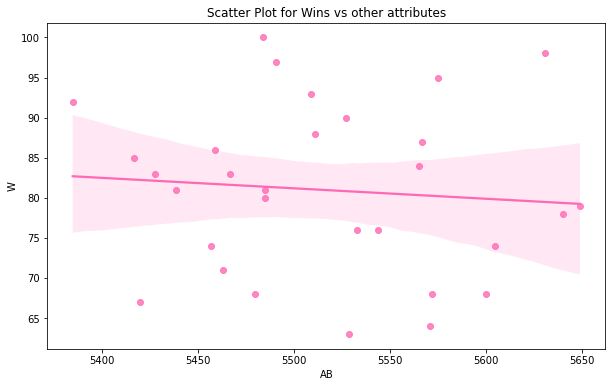

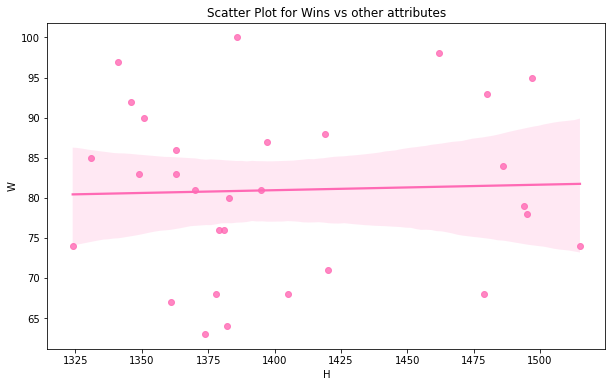

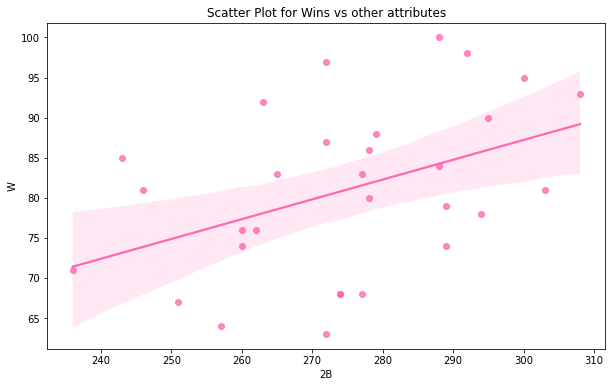

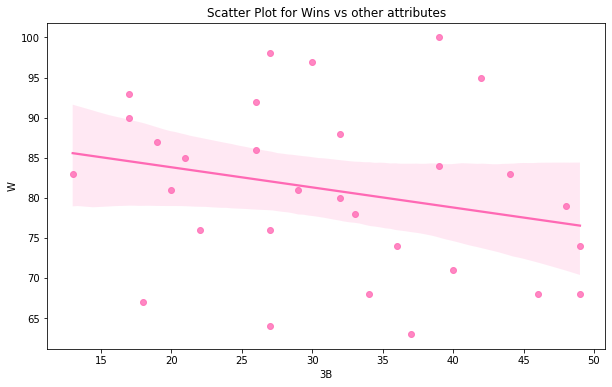

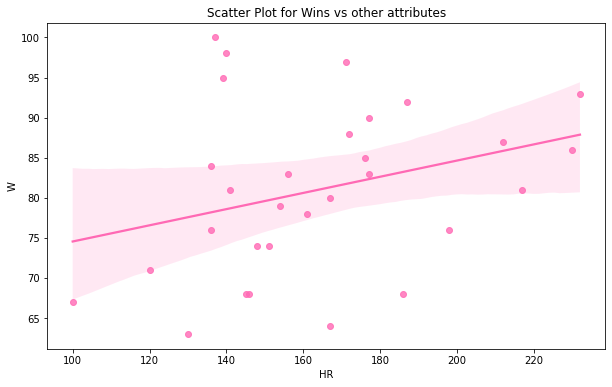

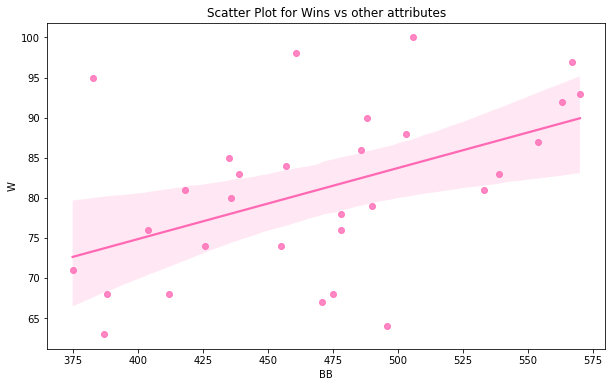

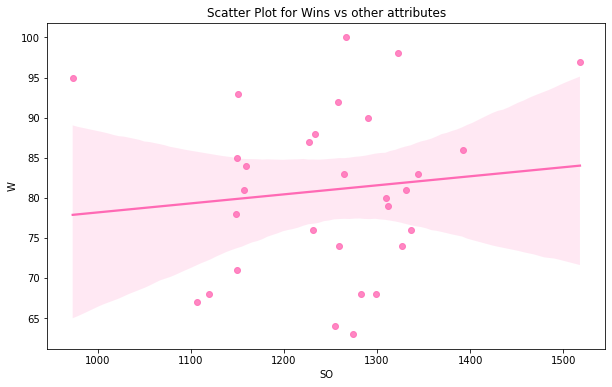

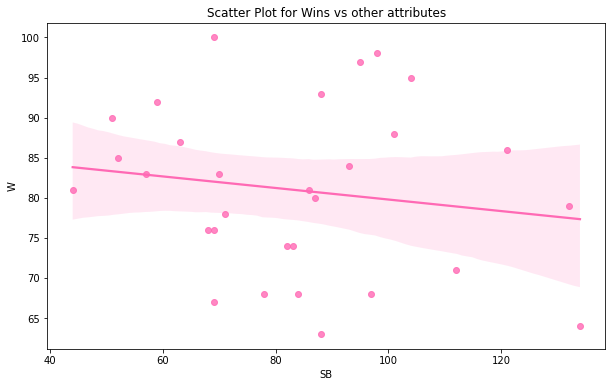

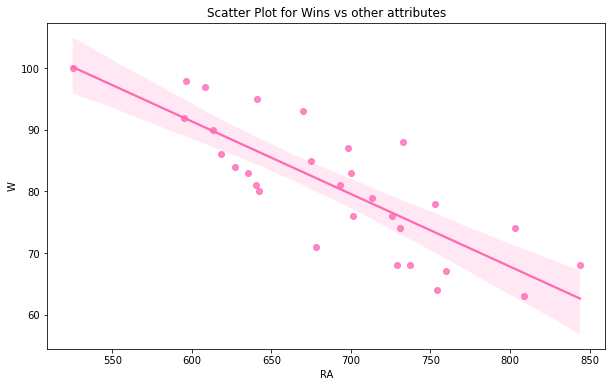

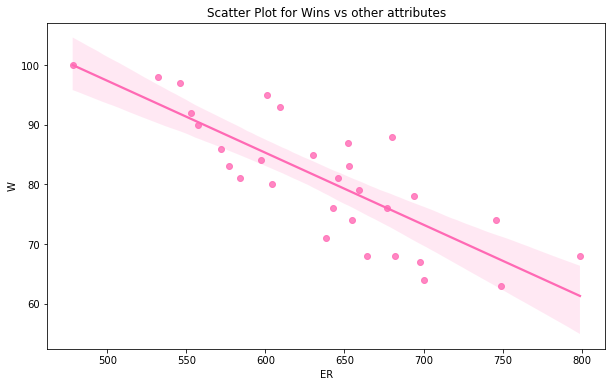

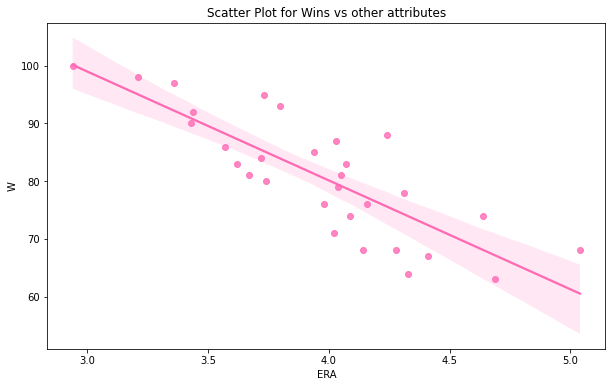

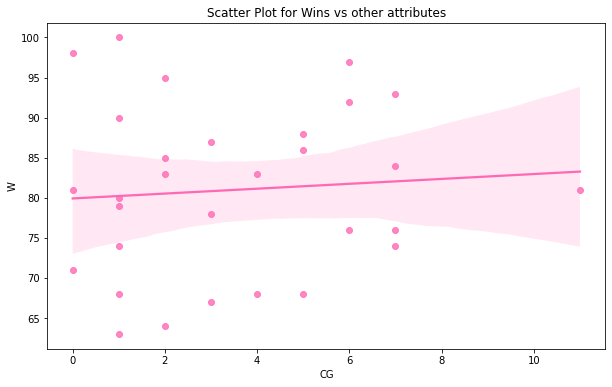

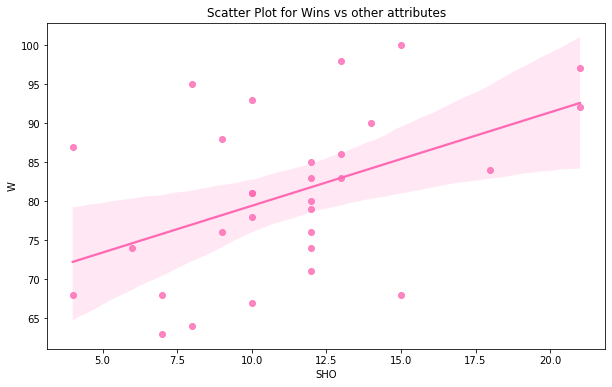

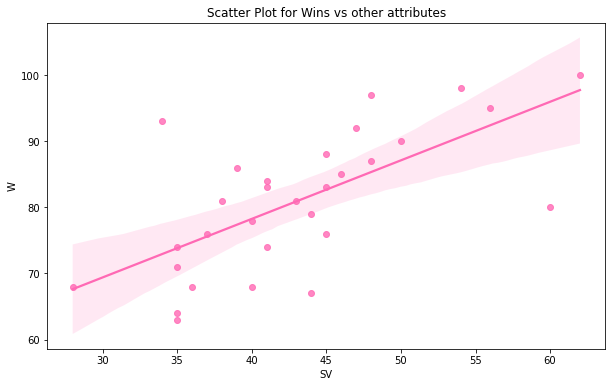

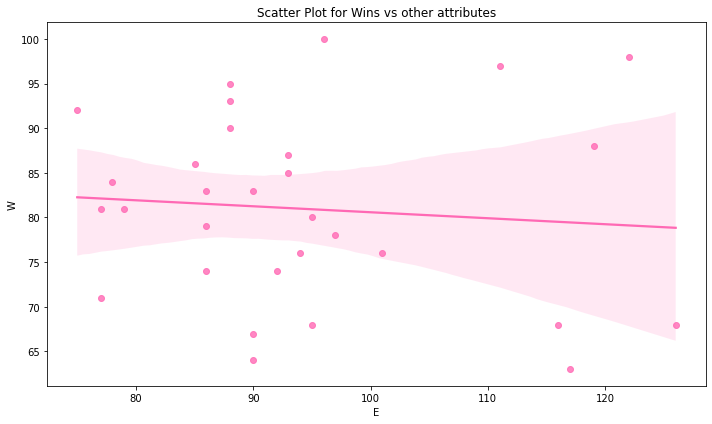

In [111]:
# Correlation analysis with scatterplot

plt.figure(figsize = (25,20), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.figure(figsize = (10,6))
        sns.regplot(df[column], df['W'], color= 'hotpink')
        plt.title('Scatter Plot for Wins vs other attributes')
        plt.xlabel(column)
        plt.ylabel('W')
        
plt.tight_layout()

In [112]:
# RA,ER,ERA have good correlation with Win. Let us check onece!

In [113]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [114]:
# correlation matrix showing our visualization about the correlation scatterplot seems to be correct.

In [115]:
# let us now check for the skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [116]:
columns= ['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

In [117]:
# from above clearly in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E) sknewness is present

In [118]:
# so these column may contain outliers, let us check!

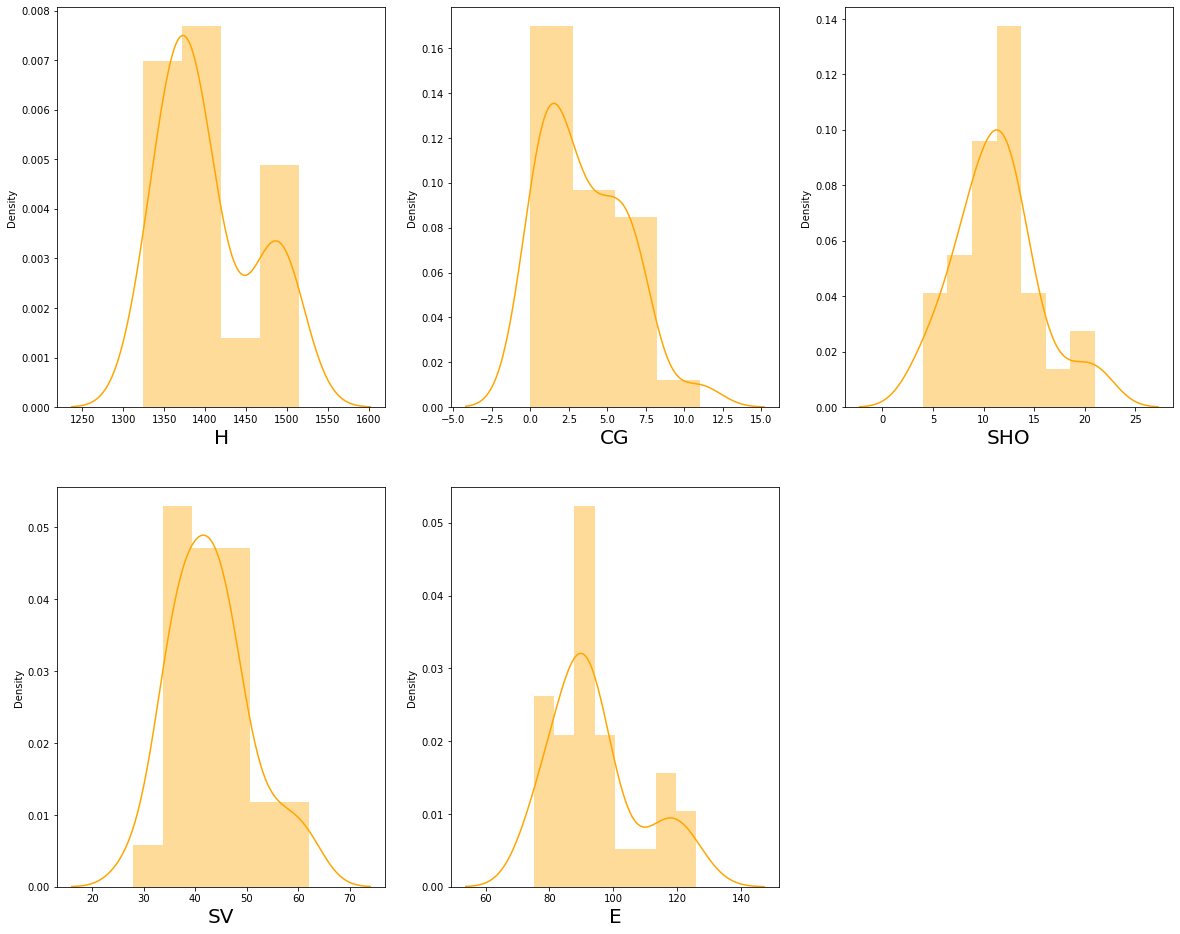

In [119]:
skew_col= ['H','CG','SHO','SV','E']

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skew_col]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color= 'orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [120]:
# let us work for the outliers

<AxesSubplot:>

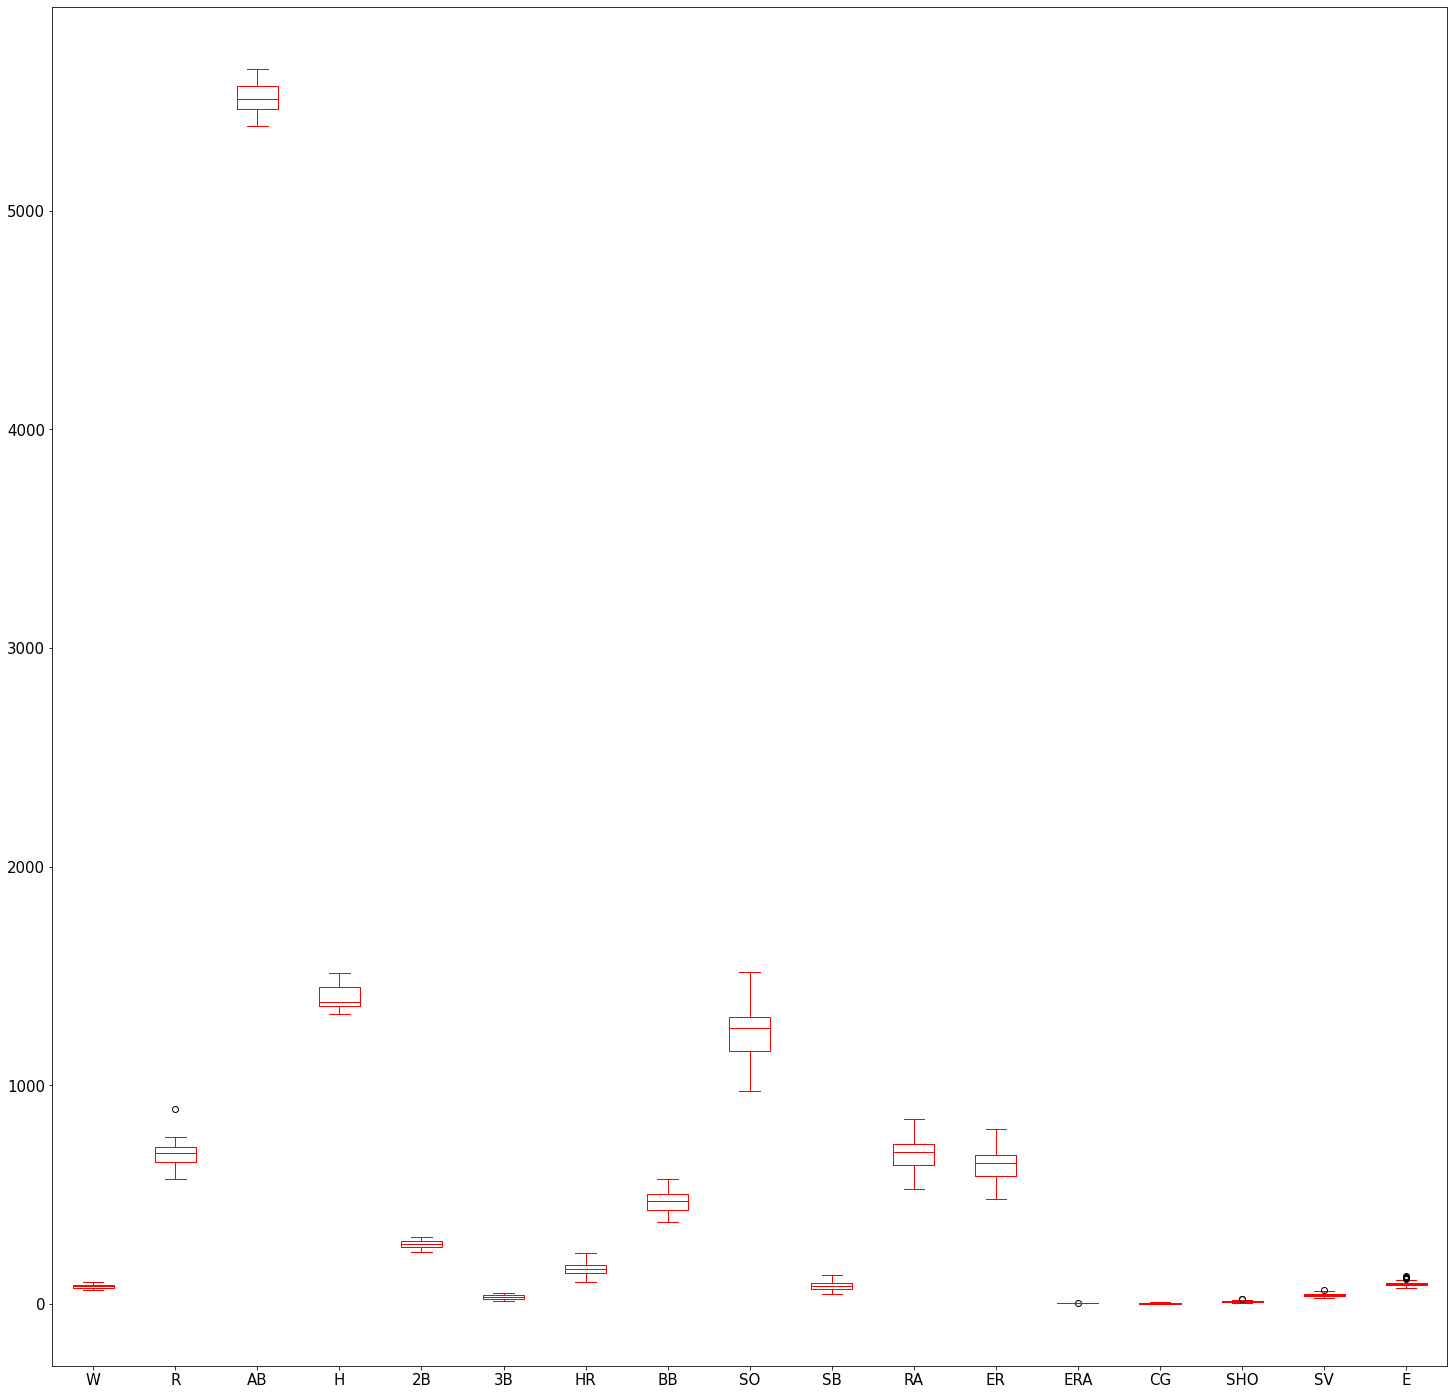

In [121]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='r')

In [122]:
#Features having outliers
outl_col=df[['R','ERA','SHO','SV','E']]

In [123]:
# let us remove these outliers by Zscore method:

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold= 3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [124]:
df= df[(z<3).all(axis=1)]
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [125]:
df.shape

(29, 17)

In [126]:
#Checking dataloss
Dataloss = (((30-29)/30)*100)
Dataloss

3.3333333333333335

In [127]:
#So, clearly dataloss in zscore method after removing outliers is 3.33% which is less than 10%
# let us check the box plot as well as the skewness now

<AxesSubplot:>

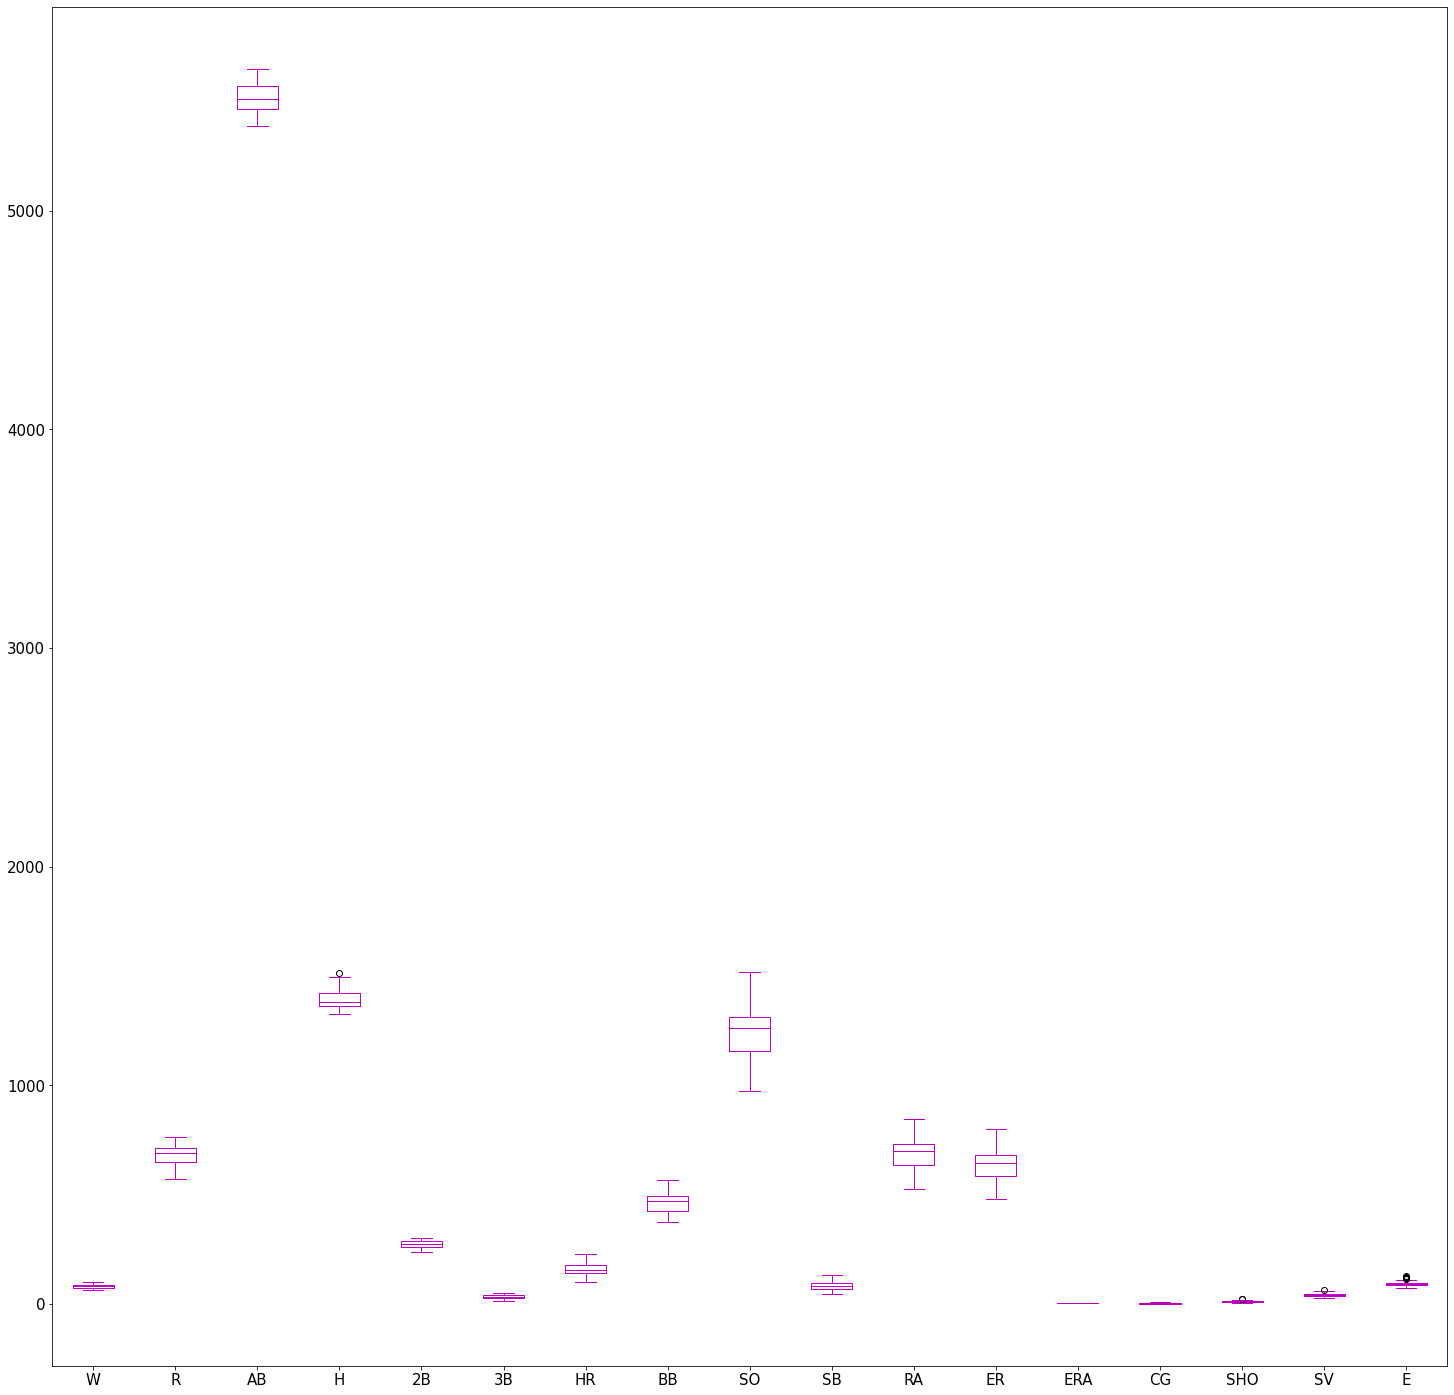

In [128]:
df.plot(kind='box',fontsize=15,figsize=(25,25),color='m')

In [129]:
# now let us remove the skewness

df["H"]=np.log1p(df["H"])
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['E','SHO','SV','CG']] = pt.fit_transform(df[['E','SHO','SV','CG']].values)

In [130]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

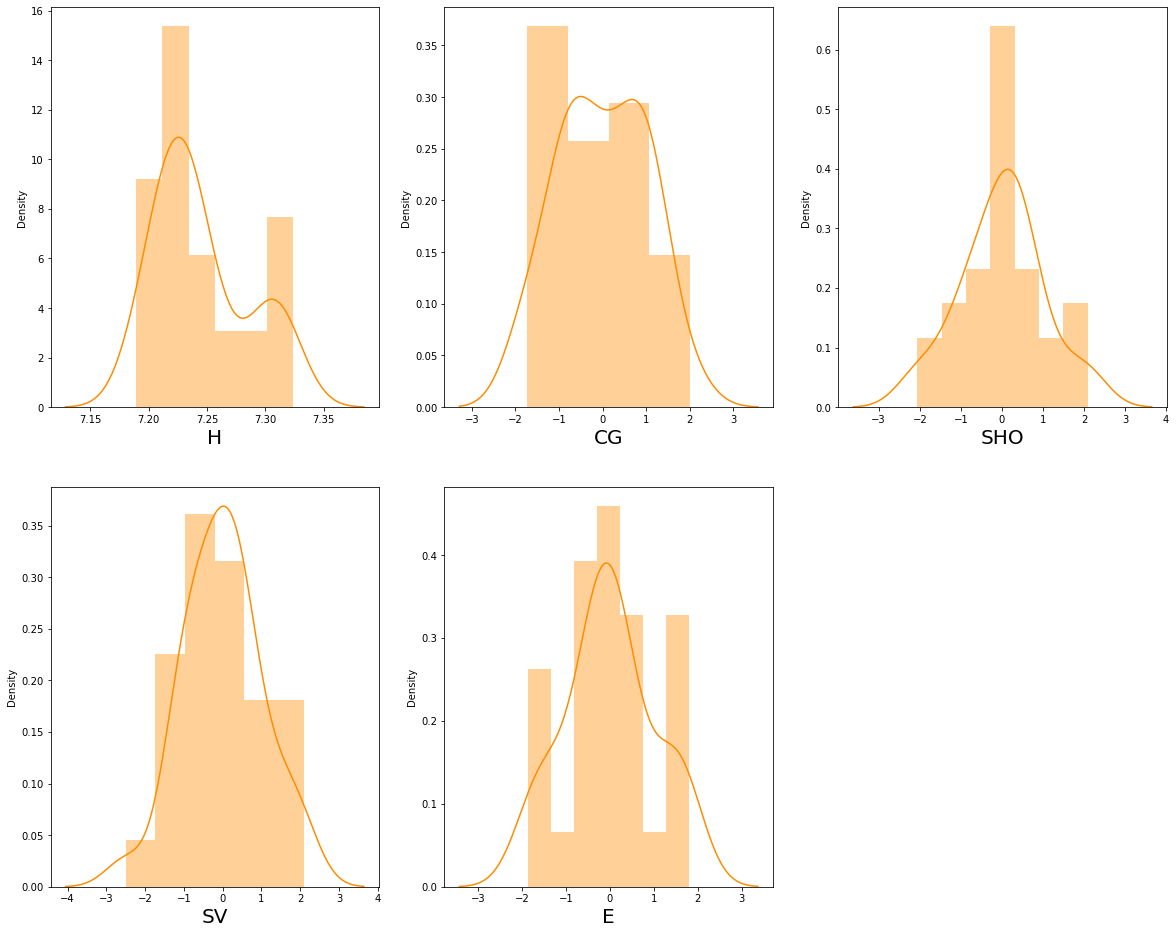

In [131]:
# Now let us check...

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skew_col]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color= 'darkorange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

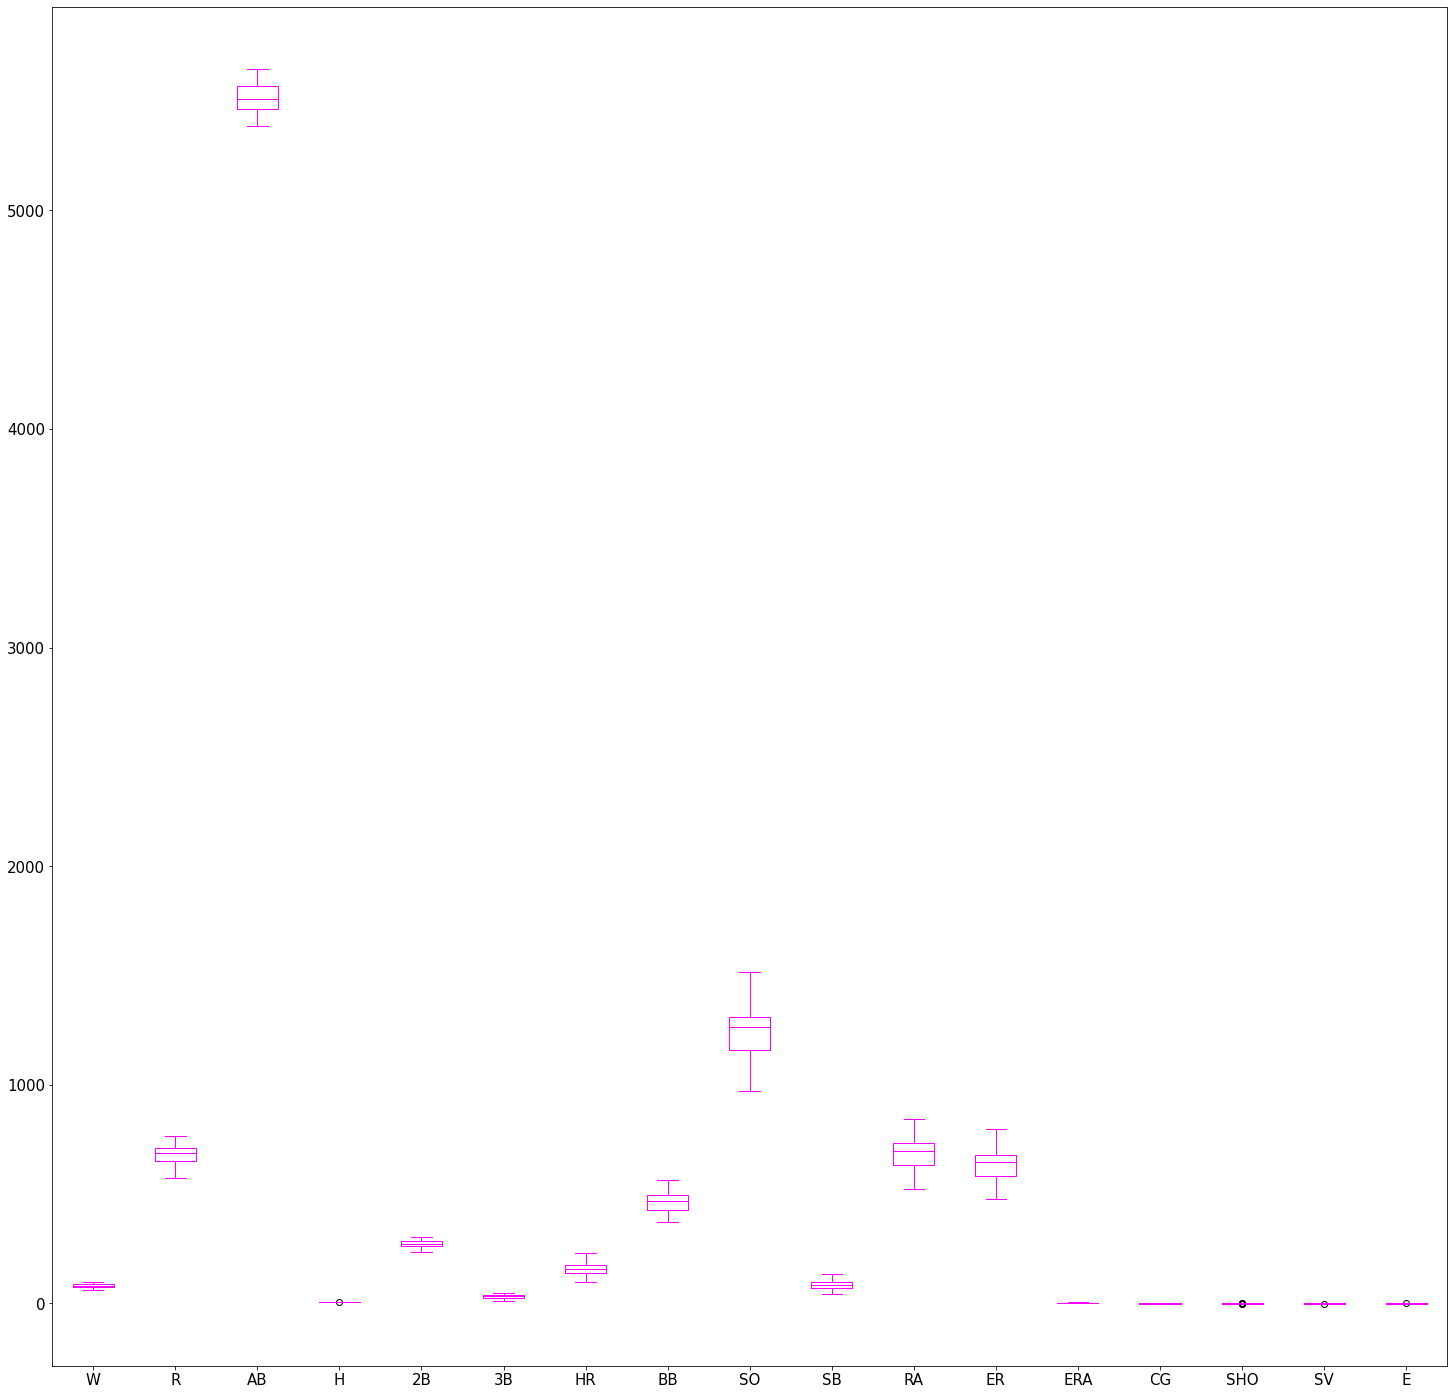

In [132]:
# Let us check the box plot as well
df.plot(kind='box',fontsize=15,figsize=(25,25),color='magenta')

In [133]:
# so the outliers and skewness is reduced to some extend!

In [134]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820
6,87,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,0.121871,-2.064039,0.677176,0.082858
7,81,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,-1.732896,-0.252844,0.052325,-1.588197
8,80,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,-0.870682,0.236737,1.908137,0.237592
9,78,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,0.121871,-0.252844,-0.365006,0.383386
10,88,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,0.770649,-0.513555,0.312020,1.554265


In [135]:
# now let us check multicollinearity using Variance inflation factor:-

In [136]:
X = df.drop("W",axis=1)
y = df["W"]

In [137]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.770649,-0.513555,0.312020,1.554265


In [138]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Features"]=X.columns
VIF

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


In [139]:
# multicolinearity exists in RA,ER,ERA. So let us drop ER column to avoid multicolinearity.

In [140]:
#Droping ER
X = X.drop(['ER'],axis=1)

In [141]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.614123,0.770649,-0.513555,0.312020,1.554265


In [142]:
# let's check further

In [143]:
VIF=pd.DataFrame()
VIF["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Features"]=X.columns
VIF

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


In [144]:
#Still VIF is high for 2 columns so let's drop RA

In [145]:
#Droping RA
X = X.drop(["RA"],axis=1)
X

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,1.264463,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.051906,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.150677,0.121871,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-0.553131,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.194815,-1.732896,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,-0.310580,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.489319,-0.870682,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.689389,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.768604,0.121871,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.349394,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.614123,0.770649,-0.513555,0.312020,1.554265


In [146]:
# again check vif

In [147]:
VIF=pd.DataFrame()
VIF["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["Features"]=X.columns
VIF

,vif_Features,Features
0,6.050871,R
1,5.138099,AB
2,8.047280,H
3,3.209892,2B
4,3.049068,3B
5,6.291910,HR
6,3.046080,BB
7,2.239867,SO
8,1.750422,SB
9,4.723327,ERA


In [148]:
# Multicolinearity is solved as each of the avobe values are below 10.

In [149]:
# Modelling

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [150]:
# machine learning models

lr= LinearRegression()
dt= DecisionTreeRegressor()
rf= RandomForestRegressor()
svr= SVR()
knn= KNeighborsRegressor(n_neighbors =4)
rd= Ridge()
ls= Lasso()

In [151]:
# finding best random states

In [152]:
# LinearRegression
maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    lr.fit(X_train,y_train)
    lr_predict_train=lr.predict(X_train)
    lr_predict_test=lr.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,lr_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,lr_predict_test))
    print('\n')
    
    if r2_score(y_test,lr_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,lr_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)
    

At random state {0} The training accuracy is : 0.9738599004491835
At random state {0} The test accuracy is : 0.446565108098806


max_accuracy 0.446565108098806 max_random_state 0
At random state {1} The training accuracy is : 0.96249417208279
At random state {1} The test accuracy is : 0.6684805291712659


max_accuracy 0.6684805291712659 max_random_state 1
At random state {2} The training accuracy is : 0.9452695562906893
At random state {2} The test accuracy is : 0.07114315184376063


At random state {3} The training accuracy is : 0.9639715909653549
At random state {3} The test accuracy is : 0.6113761896236451


At random state {4} The training accuracy is : 0.9592552216714348
At random state {4} The test accuracy is : 0.7932707810674354


max_accuracy 0.7932707810674354 max_random_state 4
At random state {5} The training accuracy is : 0.9570064575968612
At random state {5} The test accuracy is : 0.43257613673082207


At random state {6} The training accuracy is : 0.9607111064405774
At 

In [153]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9541946495908629 on random_state 47


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lrscore= cross_val_score(lr, X, y, cv=5)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :7.089656
Mean Squared error of testing set :2.665815
R2 Score of training set:0.93
R2 Score of testing set:0.98
Cross Val Score: 37.55475100260199
difference of cross-validation and R2 score is:60.33


In [155]:
# DecisionTreeRegressor

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    dt.fit(X_train,y_train)
    dt_predict_train=dt.predict(X_train)
    dt_predict_test=dt.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,dt_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,dt_predict_test))
    print('\n')
    
    if r2_score(y_test,dt_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,dt_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 1.0
At random state {0} The test accuracy is : -0.5282002534854247


At random state {1} The training accuracy is : 1.0
At random state {1} The test accuracy is : 0.556889181190398


max_accuracy 0.556889181190398 max_random_state 1
At random state {2} The training accuracy is : 1.0
At random state {2} The test accuracy is : -0.6613924050632913


At random state {3} The training accuracy is : 1.0
At random state {3} The test accuracy is : 0.5619610741561961


max_accuracy 0.5619610741561961 max_random_state 3
At random state {4} The training accuracy is : 1.0
At random state {4} The test accuracy is : 0.37241379310344824


At random state {5} The training accuracy is : 1.0
At random state {5} The test accuracy is : 0.35794701986754973


At random state {6} The training accuracy is : 1.0
At random state {6} The test accuracy is : -0.0672094508301404


At random state {7} The training accuracy is : 1.0
At random state {7} The test accuracy i

In [156]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.7871804802478699 on random_state 65


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

dtscore= cross_val_score(dt, X, y, cv=5)
dtc= dtscore.mean()
print('Cross Val Score:', dtc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(dtc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :0.000000
Mean Squared error of testing set :41.333333
R2 Score of training set:1.00
R2 Score of testing set:0.53
Cross Val Score: -218.09169790338342
difference of cross-validation and R2 score is:271.37


In [158]:
# RandomForestRegressor

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    rf.fit(X_train,y_train)
    rf_predict_train=rf.predict(X_train)
    rf_predict_test=rf.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,rf_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,rf_predict_test))
    print('\n')
    
    if r2_score(y_test,rf_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,rf_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.9183421759845157
At random state {0} The test accuracy is : 0.5284577313054499


max_accuracy 0.5284577313054499 max_random_state 0
At random state {1} The training accuracy is : 0.9306050808705224
At random state {1} The test accuracy is : 0.7061004768168366


max_accuracy 0.7061004768168366 max_random_state 1
At random state {2} The training accuracy is : 0.9231734691711769
At random state {2} The test accuracy is : -1.5008452531645573


At random state {3} The training accuracy is : 0.9221407758276825
At random state {3} The test accuracy is : 0.6075111727026363


At random state {4} The training accuracy is : 0.9139596586688084
At random state {4} The test accuracy is : 0.7419964942528736


max_accuracy 0.7419964942528736 max_random_state 4
At random state {5} The training accuracy is : 0.931749054747347
At random state {5} The test accuracy is : 0.6771829470198673


At random state {6} The training accuracy is : 0.9377903511608356
A

In [159]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.7934416247304097 on random_state 46


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 94)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rfscore= cross_val_score(rf, X, y, cv=5)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rfc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :8.315457
Mean Squared error of testing set :19.552200
R2 Score of training set:0.93
R2 Score of testing set:0.67
Cross Val Score: -61.55018920662811
difference of cross-validation and R2 score is:128.90


In [161]:
# SVR

In [162]:
maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    svr.fit(X_train,y_train)
    svr_predict_train=svr.predict(X_train)
    svr_predict_test=svr.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,svr_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,svr_predict_test))
    print('\n')
    
    if r2_score(y_test,svr_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,svr_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.17921059565172004
At random state {0} The test accuracy is : 0.05659104444236018


max_accuracy 0.05659104444236018 max_random_state 0
At random state {1} The training accuracy is : 0.20305007542900033
At random state {1} The test accuracy is : 0.09721077306818615


max_accuracy 0.09721077306818615 max_random_state 1
At random state {2} The training accuracy is : 0.26324758239922086
At random state {2} The test accuracy is : -4.161135756289708


At random state {3} The training accuracy is : 0.22479009505030378
At random state {3} The test accuracy is : 0.061475536433291844


At random state {4} The training accuracy is : 0.19980417602555545
At random state {4} The test accuracy is : 0.08711943604843886


At random state {5} The training accuracy is : 0.22238644465254775
At random state {5} The test accuracy is : 0.12718352725764293


max_accuracy 0.12718352725764293 max_random_state 5
At random state {6} The training accuracy is : 0.240

In [163]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.1481142518121843 on random_state 65


In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 65)

svr.fit(X_train, y_train)
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

svrscore= cross_val_score(svr, X, y, cv=5)
svrc= svrscore.mean()
print('Cross Val Score:', svrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(svrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :79.523966
Mean Squared error of testing set :99.221850
R2 Score of training set:0.21
R2 Score of testing set:0.14
Cross Val Score: -32.964022584817684
difference of cross-validation and R2 score is:46.62


In [165]:
# KNeighborsRegressor

In [166]:
maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    knn.fit(X_train,y_train)
    knn_predict_train=knn.predict(X_train)
    knn_predict_test=knn.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,knn_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,knn_predict_test))
    print('\n')
    
    if r2_score(y_test,knn_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,knn_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.6225224261147919
At random state {0} The test accuracy is : 0.3059054182509505


max_accuracy 0.3059054182509505 max_random_state 0
At random state {1} The training accuracy is : 0.5326525319671436
At random state {1} The test accuracy is : 0.6512660309108846


max_accuracy 0.6512660309108846 max_random_state 1
At random state {2} The training accuracy is : 0.6495741801973893
At random state {2} The test accuracy is : -1.763449367088608


At random state {3} The training accuracy is : 0.5932794425608298
At random state {3} The test accuracy is : 0.586859448139936


At random state {4} The training accuracy is : 0.6523918281297059
At random state {4} The test accuracy is : 0.5689535440613027


At random state {5} The training accuracy is : 0.7253430494061424
At random state {5} The test accuracy is : 0.504987582781457


At random state {6} The training accuracy is : 0.6343826122572161
At random state {6} The test accuracy is : 0.690523227

In [167]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.7756370277975766 on random_state 16


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 16)

knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

knnscore= cross_val_score(knn, X, y, cv=5)
knnc= knnscore.mean()
print('Cross Val Score:', knnc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(knnc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :29.508152
Mean Squared error of testing set :14.895833
R2 Score of training set:0.74
R2 Score of testing set:0.75
Cross Val Score: -1.0911189275341093
difference of cross-validation and R2 score is:76.04


In [169]:
# Ridge

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    rd.fit(X_train,y_train)
    rd_predict_train=rd.predict(X_train)
    rd_predict_test=rd.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,rd_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,rd_predict_test))
    print('\n')
    
    if r2_score(y_test,rd_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,rd_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.9656925477203806
At random state {0} The test accuracy is : 0.5457717307392198


max_accuracy 0.5457717307392198 max_random_state 0
At random state {1} The training accuracy is : 0.9428072046637695
At random state {1} The test accuracy is : 0.9142592946078554


max_accuracy 0.9142592946078554 max_random_state 1
At random state {2} The training accuracy is : 0.9381983624517559
At random state {2} The test accuracy is : 0.023242145663545655


At random state {3} The training accuracy is : 0.9585245403619125
At random state {3} The test accuracy is : 0.7113330449336648


At random state {4} The training accuracy is : 0.9519646082663467
At random state {4} The test accuracy is : 0.84039701014689


At random state {5} The training accuracy is : 0.9485125600983977
At random state {5} The test accuracy is : 0.6908165694968553


At random state {6} The training accuracy is : 0.9547766957907308
At random state {6} The test accuracy is : 0.7941399

In [170]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9185792224805992 on random_state 75


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 75)

rd.fit(X_train, y_train)
y_train_pred = rd.predict(X_train)
y_test_pred = rd.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

rdscore= cross_val_score(rd, X, y, cv=5)
rdc= rdscore.mean()
print('Cross Val Score:', rdc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(rdc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :7.592338
Mean Squared error of testing set :5.389104
R2 Score of training set:0.92
R2 Score of testing set:0.96
Cross Val Score: 45.01671307123858
difference of cross-validation and R2 score is:51.00


In [172]:
# Lasso

maxAccu= 0
maxRS= 0
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=i)
    ls.fit(X_train,y_train)
    ls_predict_train=ls.predict(X_train)
    ls_predict_test=ls.predict(X_test)
    print('At random state', {i}, 'The training accuracy is :', r2_score(y_train,ls_predict_train))
    print('At random state', {i}, 'The test accuracy is :', r2_score(y_test,ls_predict_test))
    print('\n')
    
    if r2_score(y_test,ls_predict_test)> maxAccu:
        maxAccu=r2_score(y_test,ls_predict_test)
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

At random state {0} The training accuracy is : 0.8950128690520855
At random state {0} The test accuracy is : 0.7926607484733788


max_accuracy 0.7926607484733788 max_random_state 0
At random state {1} The training accuracy is : 0.8709556174757993
At random state {1} The test accuracy is : 0.9291944066439533


max_accuracy 0.9291944066439533 max_random_state 1
At random state {2} The training accuracy is : 0.8738841660099372
At random state {2} The test accuracy is : -0.0678231227762427


At random state {3} The training accuracy is : 0.8803143794066142
At random state {3} The test accuracy is : 0.7963438733159847


At random state {4} The training accuracy is : 0.8855662251294991
At random state {4} The test accuracy is : 0.863195873864205


At random state {5} The training accuracy is : 0.8982284597101633
At random state {5} The test accuracy is : 0.8705260468332046


At random state {6} The training accuracy is : 0.908276606161329
At random state {6} The test accuracy is : 0.82260846

In [173]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.9563770695142908 on random_state 82


In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 82)

ls.fit(X_train, y_train)
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lsscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :12.588961
Mean Squared error of testing set :3.218865
R2 Score of training set:0.88
R2 Score of testing set:0.96
Cross Val Score: 52.1101284467983
difference of cross-validation and R2 score is:43.49


In [175]:
# from above it is clear that the best model is Lasso and it has the highest efficiency!

In [176]:
# Lasso

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 82)

ls.fit(X_train, y_train)
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lsscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :12.588961
Mean Squared error of testing set :3.218865
R2 Score of training set:0.88
R2 Score of testing set:0.96
Cross Val Score: 52.1101284467983
difference of cross-validation and R2 score is:43.49


In [177]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

params={'alpha':[.00001, 0.0001,0.001, 0.01],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random']}

ls2= Lasso()

lsgrid=GridSearchCV(ls2,param_grid=params,cv=5)
lsgrid.fit(X_train,y_train)  
      
print(lsgrid.best_params_)

{'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'positive': True, 'selection': 'random'}


In [178]:
ls2= Lasso(alpha=0.01, fit_intercept= True, normalize= True, positive= True, selection= 'random')
ls2.fit(X_train, y_train)
ls2.score(X_train, y_train)
pred_decision= ls2.predict(X_test)

ls2s= r2_score(y_test, pred_decision)
print('R2 score:', ls2s*100)

ls2score= cross_val_score(ls2, X, y, cv=5)
ls2c= ls2score.mean()
print('Cross Val Score:', ls2c*100)
print('difference of cross-validation and R2 score is:%.2f'%abs(ls2c*100- r2_score(y_test, y_test_pred)*100))

R2 score: 60.374032031587355
Cross Val Score: 6.956737770362972
difference of cross-validation and R2 score is:88.64


In [179]:
# efficiency is not increasing!
# So we shall use the previous one!

In [180]:
# Lasso

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 82)

ls.fit(X_train, y_train)
y_train_pred = ls.predict(X_train)
y_test_pred = ls.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lsscore= cross_val_score(ls, X, y, cv=5)
lsc= lsscore.mean()
print('Cross Val Score:', lsc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lsc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :12.588961
Mean Squared error of testing set :3.218865
R2 Score of training set:0.88
R2 Score of testing set:0.96
Cross Val Score: 52.1101284467983
difference of cross-validation and R2 score is:43.49


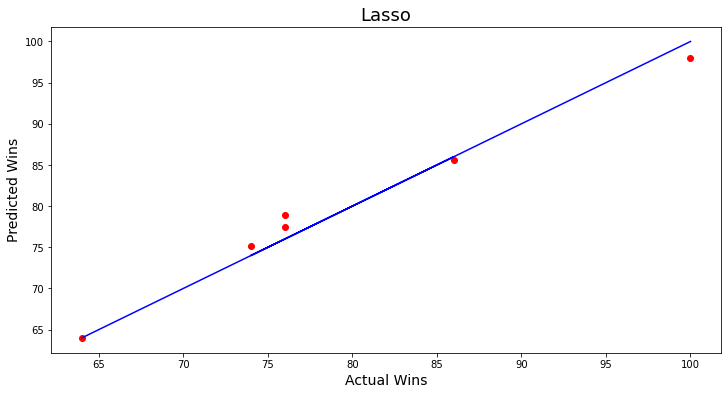

In [192]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=y_test_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Lasso',fontsize=18)
plt.show()

In [190]:
# let us check for the linear regression once...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=47)

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#mean_squared_error of train set
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

#mean_squared_error of test set
p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

# R2 score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

lrscore= cross_val_score(lr, X, y, cv=5)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

print('difference of cross-validation and R2 score is:%.2f'%abs(lrc*100- r2_score(y_test, y_test_pred)*100))

Mean Squared error of training set :7.089656
Mean Squared error of testing set :2.665815
R2 Score of training set:0.93
R2 Score of testing set:0.98
Cross Val Score: 37.55475100260199
difference of cross-validation and R2 score is:60.33


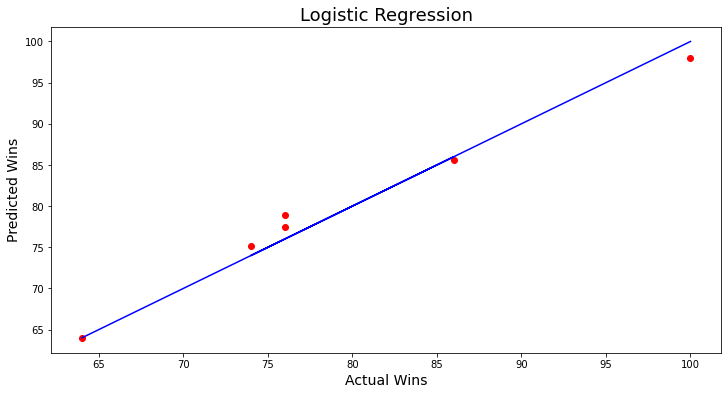

In [193]:
plt.figure(figsize=(12,6))
plt.scatter(x=y_test,y=y_test_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

In [194]:
# almost same for Lasso and Linear regression... but efficiency is better for lasso

In [ ]:
# Conclusion

In [195]:
import pickle
filename= 'churn.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [196]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

93.0364972809314


In [197]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],y_test_pred[:]], index=['Predicted','Original'])

In [198]:
conclusion

,0,1,2,3,4,5
Predicted,97.576156,74.109922,75.902343,87.098072,78.289276,69.764031
Original,97.986541,77.461642,75.195581,85.631891,78.870449,63.990878
